Amalgamated basis kets: |n_up> |n_down>
|011⟩ |011⟩
|011⟩ |101⟩
|011⟩ |110⟩
|101⟩ |011⟩
|101⟩ |101⟩
|101⟩ |110⟩
|110⟩ |011⟩
|110⟩ |101⟩
|110⟩ |110⟩

Hamiltonian in Occupation # Basis: U =   0.1
[[ 0.2 -1.   1.  -1.   0.   0.   1.   0.   0. ]
 [-1.   0.1 -1.   0.  -1.   0.   0.   1.   0. ]
 [ 1.  -1.   0.1  0.   0.  -1.   0.   0.   1. ]
 [-1.   0.   0.   0.1 -1.   1.  -1.   0.   0. ]
 [ 0.  -1.   0.  -1.   0.2 -1.   0.  -1.   0. ]
 [ 0.   0.  -1.   1.  -1.   0.1  0.   0.  -1. ]
 [ 1.   0.   0.  -1.   0.   0.   0.1 -1.   1. ]
 [ 0.   1.   0.   0.  -1.   0.  -1.   0.1 -1. ]
 [ 0.   0.   1.   0.   0.  -1.   1.  -1.   0.2]]

Eigenenergies: U =   0.1
[ 4.13370575  1.16739909 -1.83370575 -1.86739909 -1.86739909 -1.9
  1.16739909  1.1         1.1       ]

Lowest Eigenenergy: U =   0.1
-1.899999999999998

Lowest Corresponding Eigenstate: U =   0.1
[ 2.22912369e-15 -4.08248290e-01 -4.08248290e-01  4.08248290e-01
  1.13411451e-14 -4.08248290e-01  4.08248290e-01  4.08248290e-01
 -8.59641114e-15]



 [ 0.   0.   1.   0.   0.  -1.   1.  -1.  12.4]]

Eigenenergies: U =   6.2
[13.82278299 12.66781592  6.77721701  4.93218408 12.66781592  4.2
  4.93218408  7.2         7.2       ]

Lowest Eigenenergy: U =   6.2
4.199999999999994

Lowest Corresponding Eigenstate: U =   6.2
[-1.17137455e-16 -4.08248290e-01 -4.08248290e-01  4.08248290e-01
 -1.24885563e-17 -4.08248290e-01  4.08248290e-01  4.08248290e-01
  2.93469564e-17]




Hamiltonian in Occupation # Basis: U =   6.3
[[12.6 -1.   1.  -1.   0.   0.   1.   0.   0. ]
 [-1.   6.3 -1.   0.  -1.   0.   0.   1.   0. ]
 [ 1.  -1.   6.3  0.   0.  -1.   0.   0.   1. ]
 [-1.   0.   0.   6.3 -1.   1.  -1.   0.   0. ]
 [ 0.  -1.   0.  -1.  12.6 -1.   0.  -1.   0. ]
 [ 0.   0.  -1.   1.  -1.   6.3  0.   0.  -1. ]
 [ 1.   0.   0.  -1.   0.   0.   6.3 -1.   1. ]
 [ 0.   1.   0.   0.  -1.   0.  -1.   6.3 -1. ]
 [ 0.   0.   1.   0.   0.  -1.   1.  -1.  12.6]]

Eigenenergies: U =   6.3
[14.00281578 12.86439651  6.89718422  5.03560349 12.86439651  4.3
  5.03

C:\Users\diego\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


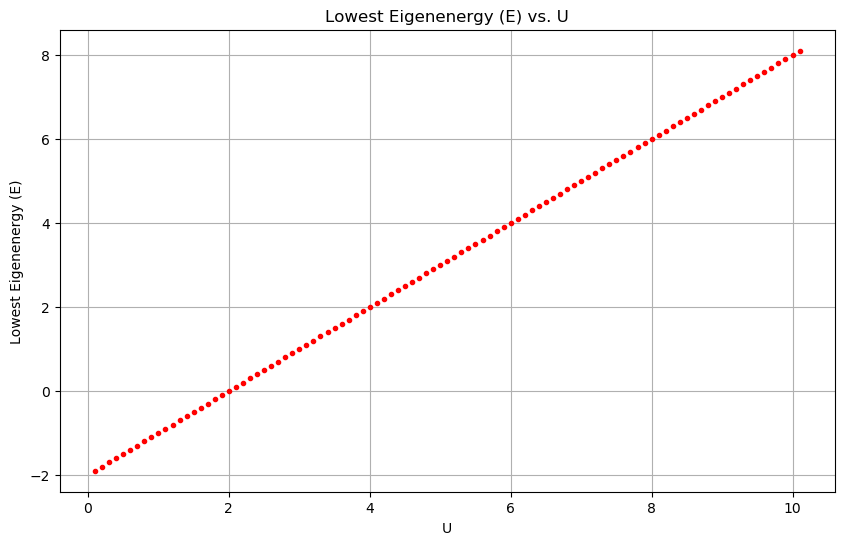

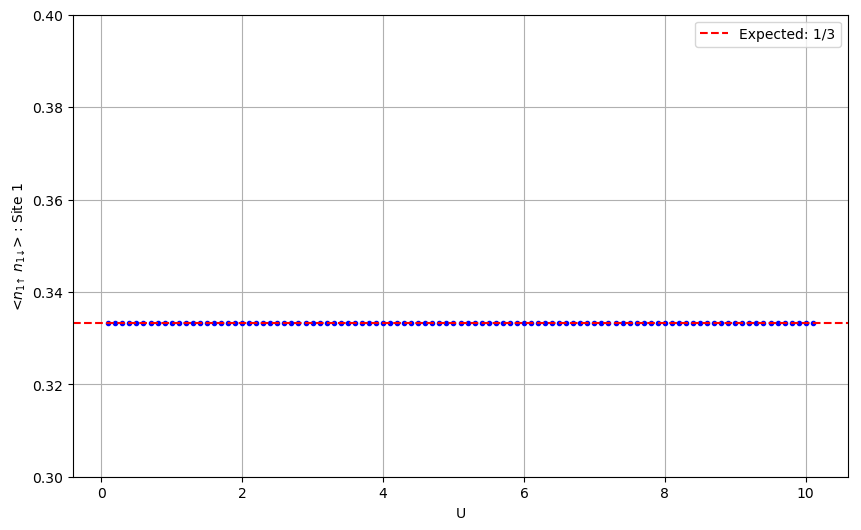

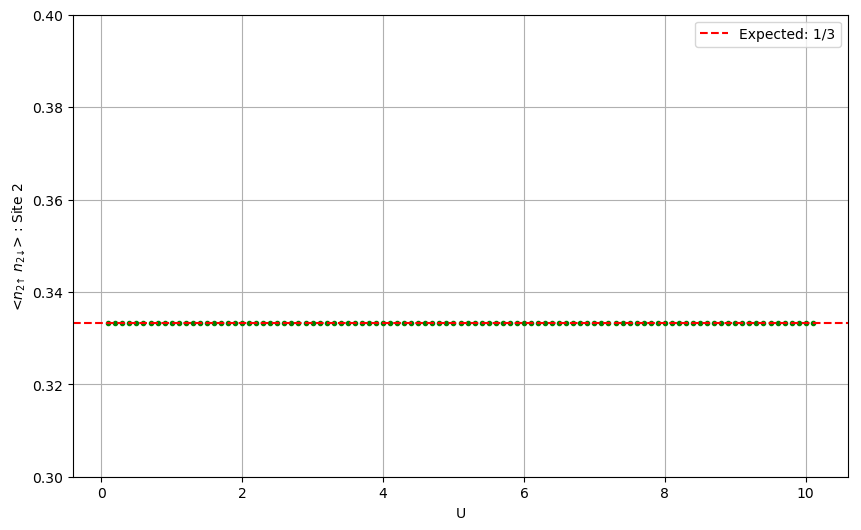

This tells us that the Low Energy Eigenstates are weighted almost entirely towards configurations which avoid x2 double occupancy of our sites in this case this would be states |1>, |5> and |9>, this can be verified easily. As a result at a low energy eigenstate our system of electrons arranges itself in one of the 6 remaining configs which only has a sinlge site doubly occupied. As expected when restricting ourselves to these 6 configurations, elementary mathematics tells us that <n1_up * n1_down> = 2/6 = 1/3, This is explicitly verified on our graphs which have only very small deviations from 1/3


The order of the deviations are about
Site 1:  (3.0531133177191805e-15+0j)
Site 2:  (2.7755575615628914e-15+0j)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker


# Parameters 
num_sites = 3  # Sites
num_up = 2     # spin-up electrons
num_down = 2   # spin-down electrons
t = 1.0        # Hopping parameter
U = 1.0        # On-site interaction parameter

#Define As needed
nU1nD1_avg_values = []
nU2nD2_avg_values = []


# Hilbert space dimension calculation
def nCr(n, r):
    """ Calculate combination nCr """
    return np.math.factorial(n) // (np.math.factorial(r) * np.math.factorial(n - r))

dim_up = nCr(num_sites, num_up)     # Dimension of spin-up subspace
dim_down = nCr(num_sites, num_down) # Dimension of spin-down subspace
dim = dim_up * dim_down             # Total dimension of Amalgamated Hilbert space

def state_to_ket(state, num_sites):
    """ Convert a state from its integer representation to ket representation """
    return '|' + ''.join(['1' if state & (1 << n) else '0' for n in range(num_sites)][::-1]) + '⟩'




# Generate basis states using bit patterns
def generate_basis(num_sites, num_particles):
    """ Generate basis states for a given number of particles in sites """
    
    "Explanation: "
    "# Converts listed index (see HW) into a bit pattern then counts number"
    "of 1's or electrons on our sites, then checks to see if that number is"
    "equal to the num of particles and is a valid state to be included in the basis"
    basis = [] 
    configs = 1 << num_sites # This computes the number of configs we can have by shifting binary num 1 3 places giving 1000 = 8 (a 4 site problem)
    
    #print(configs)
    for i in range(1 << num_sites): # iterate over all configs
        if bin(i).count("1") == num_particles: 
            basis.append(i)
    # Only 3 configs are included 011 = 3, 101 = 5, and 110=6        
    
    #print(basis)
    return basis

def generate_amalgamated_basis(basis_up, basis_down):
    """ Generate the amalgamated basis by combining spin-up and spin-down states """
    amalgamated_basis = []
    for state_up in basis_up:
        for state_down in basis_down:
            ket_up = state_to_ket(state_up, num_sites)
            ket_down = state_to_ket(state_down, num_sites)
            amalgamated_basis.append((ket_up, ket_down))
    return amalgamated_basis

# Helper function to find the index of a state in the basis
def find_state_index(state, basis):
    try:
        return basis.index(state)
    except ValueError:
        return -1
    
def diagonalize(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    D = np.diag(eigenvalues)
    #print(D)
    P = eigenvectors
    P_inv = np.linalg.inv(P)
    A_reconstructed = P @ D @ P_inv
    #P, A_reconstructed
    return D
def eigenvalues1(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues


def find_lowest_eigenvalue(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    #print(eigenvalues)
    #print(np.sum(eigenvalues))
    lowest_eigenvalue = np.min(eigenvalues)
    return lowest_eigenvalue


def find_lowest_eigenstate(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    min_index = np.argmin(eigenvalues)
    #print(eigenvectors)
    lowest_eigenvector = eigenvectors[:, min_index]
    #print(lowest_eigenvector)
    return lowest_eigenvector

def create_nUnD(diagonal_values1):
    # Create a square matrix of zeros with the appropriate size
    size = len(diagonal_values1)
    matrix = np.zeros((size, size))

    # Fill the diagonal with the provided values
    np.fill_diagonal(matrix, diagonal_values1)

    return matrix


def store_double_occupation(basis_up, basis_down, num_sites):
    """ 
    Store the double occupation status for each site across all amalgamated basis states.
    Returns a list of arrays, each array corresponds to a site and contains
    double occupation status for that site across all amalgamated basis states.
    """
    # Initialize arrays to store double occupation status for each site
    double_occupation_site = [np.zeros(len(basis_up) * len(basis_down), dtype=int) for _ in range(num_sites)]

    # Iterate through each combination of spin-up and spin-down states
    for i, state_up in enumerate(basis_up):
        for j, state_down in enumerate(basis_down):
            # Calculate the index in the amalgamated basis
            amalgamated_idx = i * len(basis_down) + j

            # Check double occupation for each site
            for site in range(num_sites):
                if (state_up & (1 << site)) and (state_down & (1 << site)):
                    double_occupation_site[site][amalgamated_idx] = 1  # Doubly occupied

    return double_occupation_site

basis_up = generate_basis(num_sites, num_up)
basis_down = generate_basis(num_sites, num_down)
amalgamated_basis = generate_amalgamated_basis(basis_up, basis_down)

print("Amalgamated basis kets: |n_up> |n_down>")
for ket_up, ket_down in amalgamated_basis:
    print(f"{ket_up} {ket_down}")

u_values = np.arange(0.1, 10.2, 0.1)
lowest_eigenvalues = []

double_occupation_diagnol = store_double_occupation(basis_up, basis_down, num_sites)



#for site in range(num_sites):
    #print(f"Double occupation for site {site+1}: {double_occupation_diagnol[site]}")   










for u in u_values:
    # Initialize the Hamiltonian of correct dimension
    
    H = np.zeros((dim, dim))
    
    # Construct the Hamiltonian
    for i, state_up in enumerate(basis_up):
        for j, state_down in enumerate(basis_down):
            # Diagonal elements (interaction term)
            for k in range(num_sites):
                if (state_up & (1 << k)) and (state_down & (1 << k)):
                    H[i * dim_down + j, i * dim_down + j] += u

            # Off-diagonal elements (hopping term with conditional sign change)
            for k in range(num_sites):
                next_k = (k + 1) % num_sites  # Next site with PBC

                # Check occupancy of site 2 for spin-up and spin-down electrons
                site_2_occupied_up = state_up & (1 << 1)
                site_2_occupied_down = state_down & (1 << 1)

                # Hopping for spin-up electrons with conditional sign change
                if (state_up & (1 << k)) and not (state_up & (1 << next_k)):
                    sign_change = -1 if (k == 0 or k == 2) and site_2_occupied_up else 1
                    new_state_up = (state_up ^ (1 << k)) ^ (1 << next_k)
                    new_index = find_state_index(new_state_up, basis_up)
                    if new_index >= 0:
                        H[i * dim_down + j, new_index * dim_down + j] -= sign_change * t
                        H[new_index * dim_down + j, i * dim_down + j] -= sign_change * t

                # Hopping for spin-down electrons with conditional sign change
                if (state_down & (1 << k)) and not (state_down & (1 << next_k)):
                    sign_change = -1 if (k == 0 or k == 2) and site_2_occupied_down else 1
                    new_state_down = (state_down ^ (1 << k)) ^ (1 << next_k)
                    new_index = find_state_index(new_state_down, basis_down)
                    if new_index >= 0:
                        H[i * dim_down + j, i * dim_down + new_index] -= sign_change * t
                        H[i * dim_down + new_index, i * dim_down + j] -= sign_change * t

    eigenvalue_list = eigenvalues1(H)
    lowest_eigenvalue = find_lowest_eigenvalue(H)
    lowest_eigenvalues.append(lowest_eigenvalue)
    l_eigenstate = find_lowest_eigenstate(H)
    l_eigenstate_hc = l_eigenstate.conj().T
    
    
    # if you wish to generalize this part for N sites you have to add another iteration outside the iteration across u
    nU1nD1 = create_nUnD(double_occupation_diagnol[0])   
    nU1nD1_avg = l_eigenstate_hc @ nU1nD1 @ l_eigenstate
    nU1nD1_avg_values.append(nU1nD1_avg)
    
    nU2nD2 = create_nUnD(double_occupation_diagnol[1])
    nU2nD2_avg = l_eigenstate_hc @ nU2nD2 @ l_eigenstate
    nU2nD2_avg_values.append(nU2nD2_avg)
    
    

    print("\nHamiltonian in Occupation # Basis: U =  ", u)
    print(H)
    print("\nEigenenergies: U =  ", u)
    print(eigenvalue_list)
    print("\nLowest Eigenenergy: U =  ", u)
    print(lowest_eigenvalue)
    print("\nLowest Corresponding Eigenstate: U =  ", u)
    print(l_eigenstate)
    print("\n\n")
# Print the Hamiltonian and Amalgamated Basis

print("This agrees with the same expressions derived by hand just with rows/columns interchanged")

# PLOT 1

plt.figure(figsize=(10, 6))
plt.plot(u_values, lowest_eigenvalues, "r.")
plt.title('Lowest Eigenenergy (E) vs. U')
plt.xlabel('U')
plt.ylabel('Lowest Eigenenergy (E)')
plt.grid(True)



plt.figure(figsize=(10, 6))
plt.plot(u_values, nU1nD1_avg_values ,"b.")
plt.axhline(y = 1/3, color ="red", linestyle ="--", label = 'Expected: 1/3') 
plt.ylim(0.30, 0.40) 
plt.xlabel('U')
plt.ylabel('<$n_{1\u2191}$ $n_{1\u2193}$> : Site 1')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(u_values, nU2nD2_avg_values ,"g.")
plt.axhline(y = 1/3, color ="red", linestyle ="--", label = 'Expected: 1/3') 
plt.ylim(0.30, 0.40) 
plt.xlabel('U')
plt.ylabel('<$n_{2\u2191}$ $n_{2\u2193}$> : Site 2')
plt.legend()
plt.grid(True)


plt.show()

print("This tells us that the Low Energy Eigenstates are weighted almost entirely towards configurations which avoid x2 double occupancy of our sites in this case this would be states |1>, |5> and |9>, this can be verified easily. As a result at a low energy eigenstate our system of electrons arranges itself in one of the 6 remaining configs which only has a sinlge site doubly occupied. As expected when restricting ourselves to these 6 configurations, elementary mathematics tells us that <n1_up * n1_down> = 2/6 = 1/3, This is explicitly verified on our graphs which have only very small deviations from 1/3" )


print("\n\nThe order of the deviations are about")

print("Site 1: ", np.max(nU1nD1_avg_values) - np.min(nU1nD1_avg_values))
print("Site 2: ", np.max(nU2nD2_avg_values) - np.min(nU2nD2_avg_values))